<a href="https://colab.research.google.com/github/benvictoria17/DataAnalytics/blob/main/Women%20Entrepreneurship%20-%20Visual%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Women%20Entrepreneurship%20and%20Labor%20Force/Dataset3.csv", sep=';')
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [3]:
print(list(df.Country))

['Austria', 'Belgium', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Slovakia', 'Slovenia', 'Spain', 'Croatia', 'Denmark', 'Hungary', 'Poland', 'Sweden', 'Australia', 'Iceland', 'Japan', 'Norway', 'Singapore', 'Switzerland', 'Taiwan', 'Algeria', 'Argentina', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'China', 'Costa Rica', 'Ecuador', 'Egypt', 'El Salvador', 'Ghana', 'India', 'Jamaica', 'Macedonia', 'Malaysia', 'Mexico', 'Panama', 'Peru', 'Russia', 'Saudi Arabia', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay']


In [4]:
print('Number of countries: ', len(df.Country))

Number of countries:  51


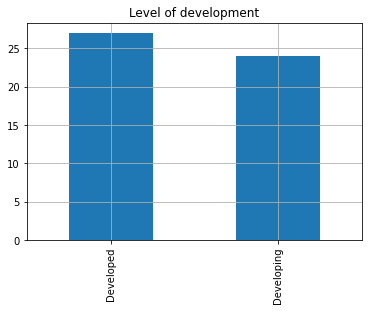

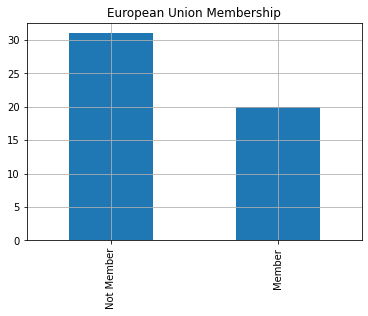

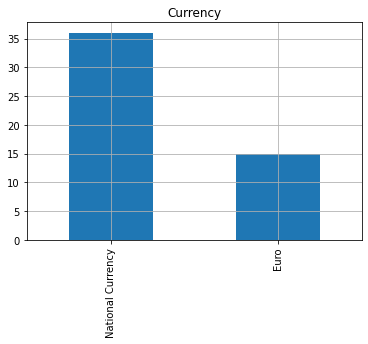

In [5]:
features_cat = ['Level of development', 'European Union Membership', 'Currency']
for v in features_cat:
    df[v].value_counts().plot(kind='bar')
    plt.title(v)
    plt.grid()
    plt.show()

In [6]:
ctab = pd.crosstab(df['Level of development'], df['European Union Membership'])
ctab

European Union Membership,Member,Not Member
Level of development,,
Developed,20,7
Developing,0,24


In [7]:
chi2, p, dof, expected = chi2_contingency(ctab.to_numpy(), lambda_="log-likelihood")
print('Chi^2 Test Statistic: ', chi2)
print('Chi^2 Indepence Test - p-value: ', p)

Chi^2 Test Statistic:  31.54352437555506
Chi^2 Indepence Test - p-value:  1.950196417883092e-08


In [8]:
print('Expected frequencies (assuming H0) based on the marginal sums:')
print(expected)

Expected frequencies (assuming H0) based on the marginal sums:
[[10.58823529 16.41176471]
 [ 9.41176471 14.58823529]]


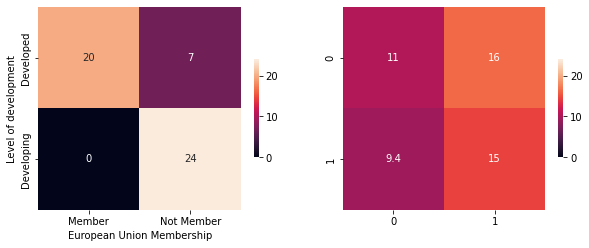

In [9]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(data=ctab, ax=ax1, cbar=1, square=True, vmin=0, vmax=24, cbar_kws={'shrink': .3}, annot=True)
sns.heatmap(data=expected, ax=ax2, cbar=1, square=True, vmin=0, vmax=24, cbar_kws={'shrink': .3}, annot=True)
plt.show()

In [10]:
ctab2 = pd.crosstab(df['European Union Membership'], df['Currency'])
ctab2

Currency,Euro,National Currency
European Union Membership,,
Member,15,5
Not Member,0,31


In [11]:
ctab3 = pd.crosstab(df['Level of development'], df['Currency'])
ctab3

Currency,Euro,National Currency
Level of development,,
Developed,15,12
Developing,0,24


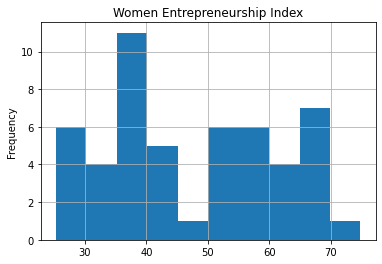

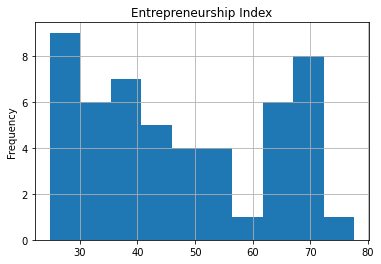

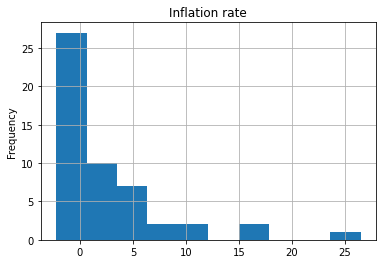

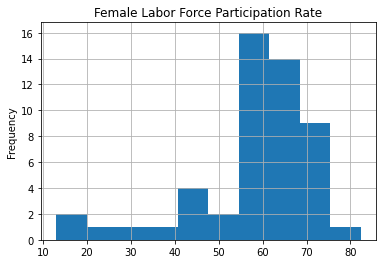

In [12]:
features_num = ['Women Entrepreneurship Index', 'Entrepreneurship Index', 
                'Inflation rate', 'Female Labor Force Participation Rate']
for v in features_num:
    df[v].plot(kind='hist')
    plt.title(v)
    plt.grid()
    plt.show()

In [13]:
df[features_num].describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000
mean,47.835294,47.241176,2.587647,58.481765
std,14.268480,16.193149,5.380639,13.864567
min,25.300000,24.800000,-2.250000,13.000000
25%,36.350000,31.900000,-0.500000,55.800000
50%,44.500000,42.700000,0.600000,61.000000
75%,59.150000,65.400000,3.600000,67.400000
max,74.800000,77.600000,26.500000,82.300000


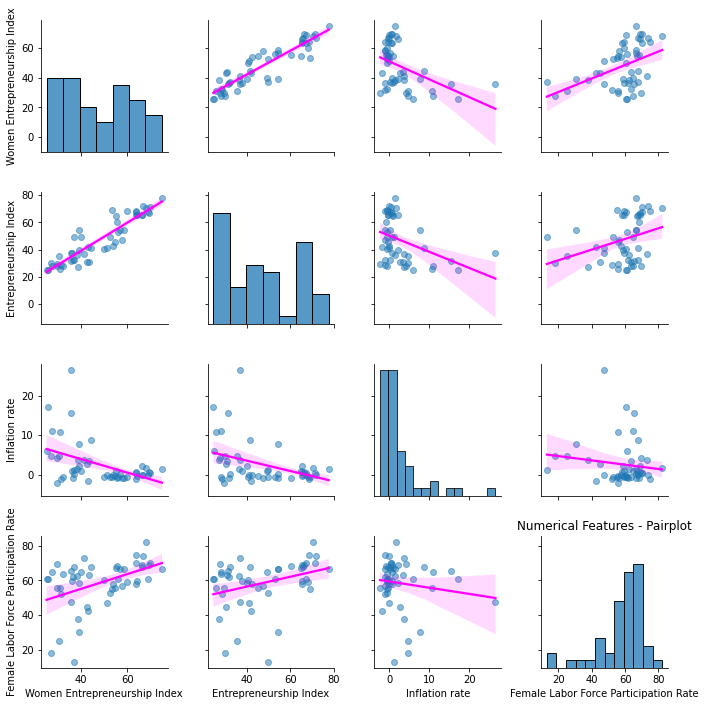

In [14]:
sns.pairplot(df[features_num], kind='reg', plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.5}})
plt.title('Numerical Features - Pairplot')
plt.show()

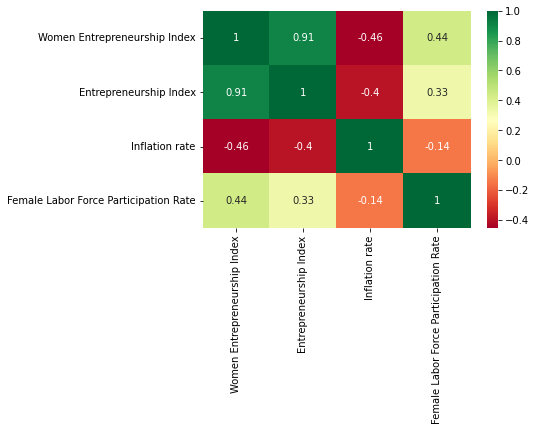

In [15]:
cor_pearson = df[features_num].corr(method='pearson')
sns.heatmap(cor_pearson, cmap=plt.cm.RdYlGn, annot=True)
plt.show()

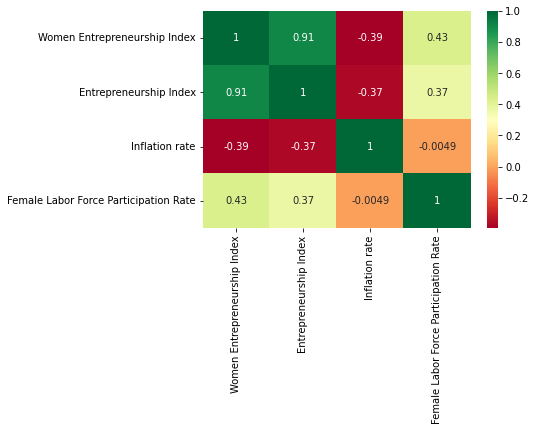

In [16]:
cor_spearman = df[features_num].corr(method='spearman')
sns.heatmap(cor_spearman, cmap=plt.cm.RdYlGn, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


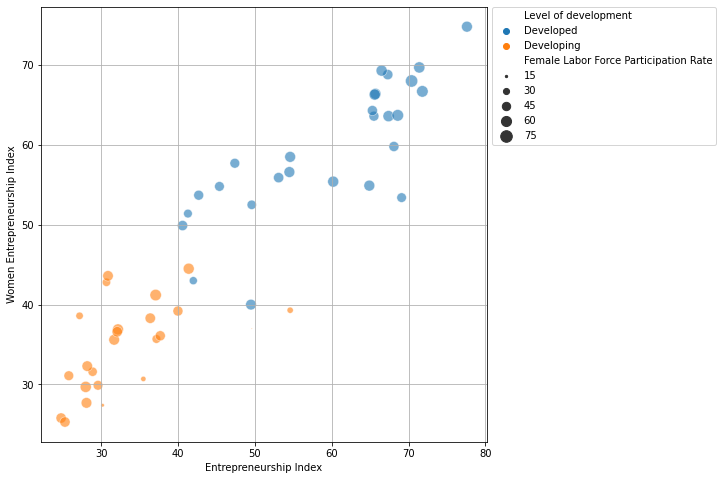

In [17]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(df['Entrepreneurship Index'], df['Women Entrepreneurship Index'],
                hue = df['Level of development'],
                size = df['Female Labor Force Participation Rate'],
                sizes = (1,150),
                alpha = 0.6)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) # move legend out of the box
plt.grid()
plt.show()

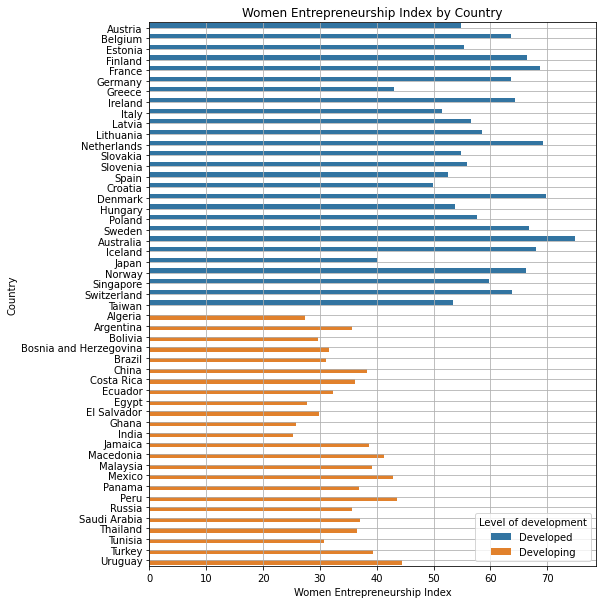

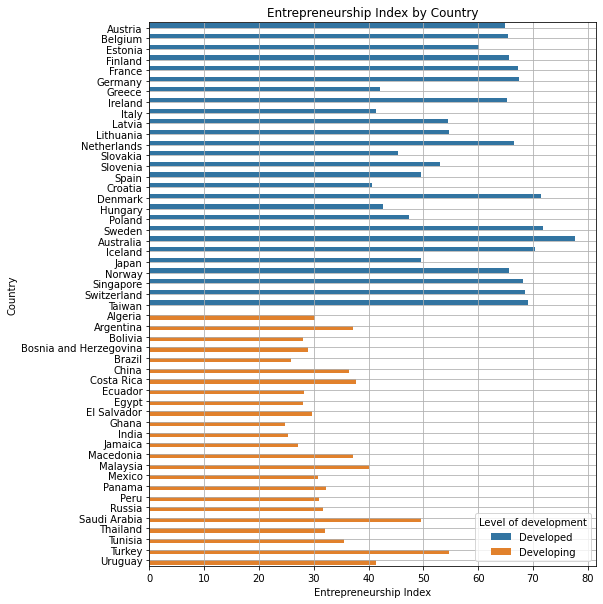

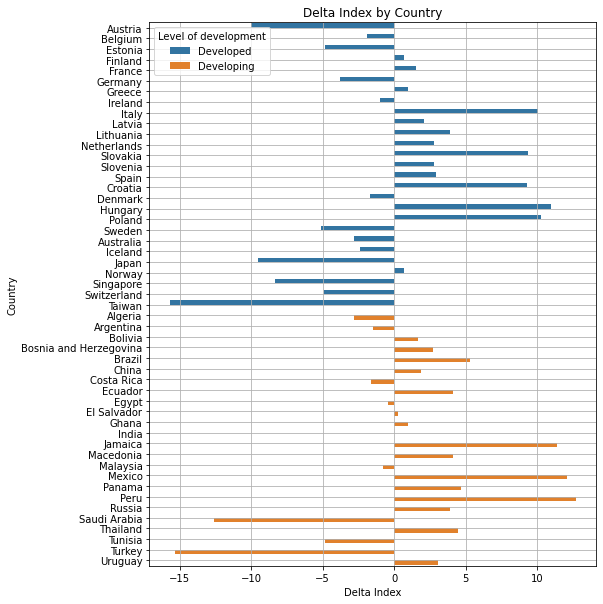

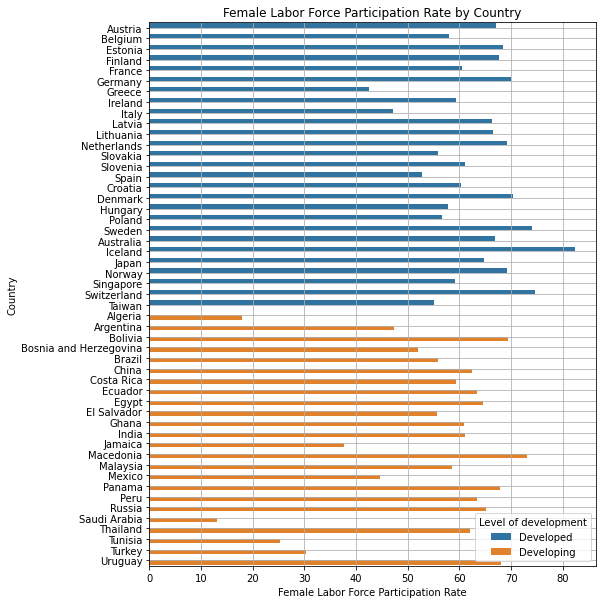

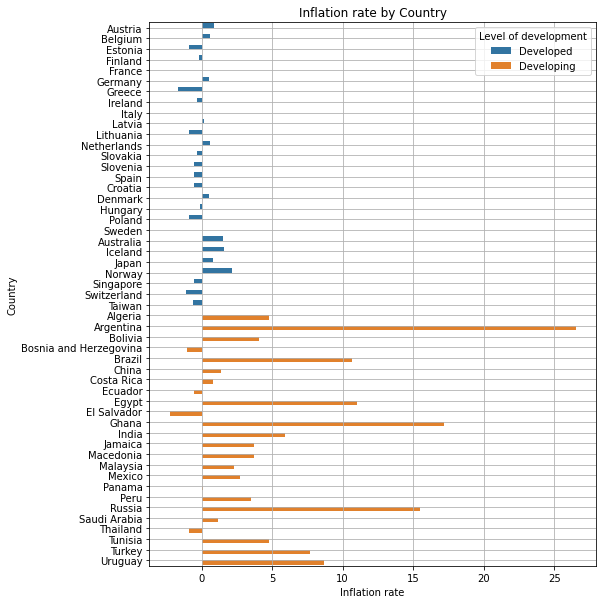

In [18]:
df['Delta Index'] = df['Women Entrepreneurship Index'] - df['Entrepreneurship Index']
var_list = ['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Delta Index', 
            'Female Labor Force Participation Rate', 'Inflation rate']
for v in var_list:
    plt.rcParams['figure.figsize']=(8,10)
    sns.barplot(y='Country', x=v, data=df, hue='Level of development')
    plt.title(v+' by Country')
    plt.grid()
    plt.show()

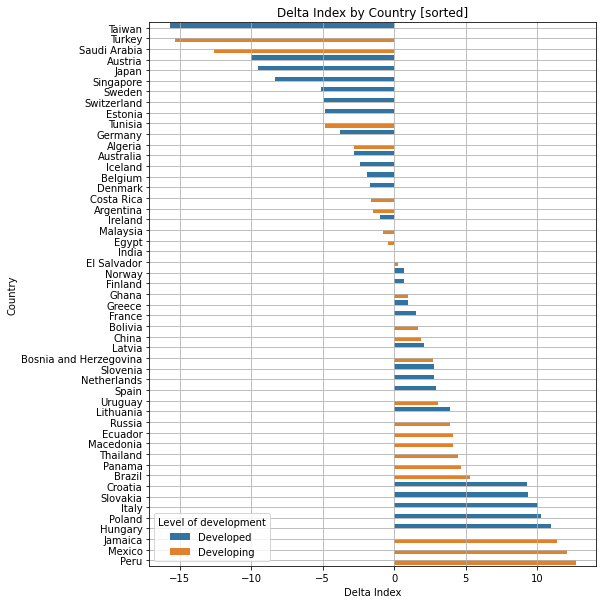

In [19]:
df_aux = df[['Country','Level of development','Delta Index']].sort_values(['Delta Index']).reset_index(drop=True)
v = 'Delta Index'
plt.rcParams['figure.figsize']=(8,10)
sns.barplot(y='Country', x=v, data=df_aux, hue='Level of development')
plt.title(v+' by Country [sorted]')
plt.grid()
plt.show()

In [20]:
df_stats_WEntInd = df.groupby('Level of development', as_index=False).agg(
    mean_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.mean),
    min_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.min),
    median_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.median),
    max_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.max))
df_stats_WEntInd

,Level of development,mean_Women_Entr_Ind,min_Women_Entr_Ind,median_Women_Entr_Ind,max_Women_Entr_Ind
0,Developed,59.359259,40.0,58.5,74.8
1,Developing,34.870833,25.3,35.9,44.5


In [21]:
df_stats_EntInd = df.groupby('Level of development', as_index=False).agg(
    mean_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.mean),
    min_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.min),
    median_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.median),
    max_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.max))
df_stats_EntInd

,Level of development,mean_Entr_Ind,min_Entr_Ind,median_Entr_Ind,max_Entr_Ind
0,Developed,59.485185,40.6,65.3,77.6
1,Developing,33.466667,24.8,31.3,54.6


In [22]:
df_stats_DeltaInd = df.groupby('Level of development', as_index=False).agg(
    mean_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.mean),
    min_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.min),
    median_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.median),
    max_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.max))
df_stats_DeltaInd

,Level of development,mean_DeltaInd,min_DeltaInd,median_DeltaInd,max_DeltaInd
0,Developed,-0.125926,-15.7,0.7,11.0
1,Developing,1.404167,-15.3,1.8,12.7


In [23]:
df_stats_FemLabF = df.groupby('Level of development', as_index=False).agg(
    mean_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.mean),
    min_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.min),
    median_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.median),
    max_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.max))
df_stats_FemLabF

,Level of development,mean_FemLabForcePart,min_FemLabForcePart,median_FemLabForcePart,max_FemLabForcePart
0,Developed,63.095556,42.5,64.7,82.3
1,Developing,53.291250,13.0,60.1,73.0


In [24]:
df_stats_Infl = df.groupby('Level of development', as_index=False).agg(
    mean_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.mean),
    min_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.min),
    median_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.median),
    max_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.max))
df_stats_Infl

,Level of development,mean_Inflation,min_Inflation,median_Inflation,max_Inflation
0,Developed,0.014074,-1.70,-0.1,2.17
1,Developing,5.482917,-2.25,3.7,26.50


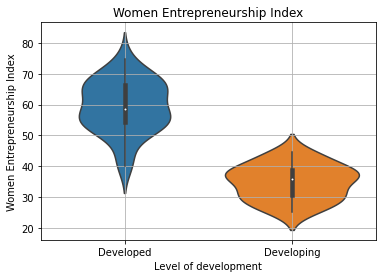

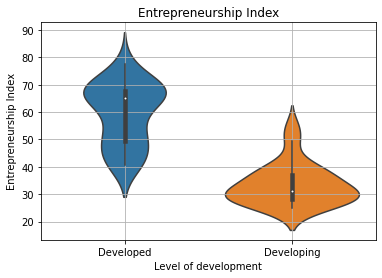

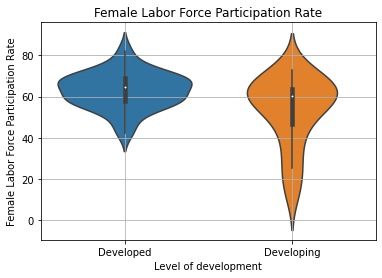

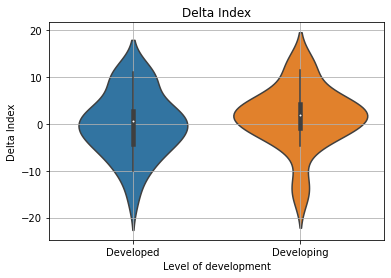

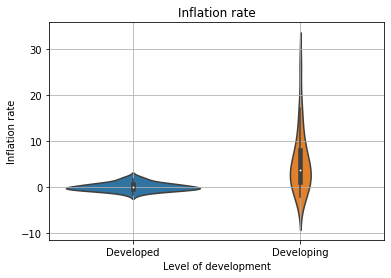

In [25]:
var_list = ['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Female Labor Force Participation Rate',
            'Delta Index', 'Inflation rate']
for v in var_list:
    plt.rcParams['figure.figsize']=(6,4)
    sns.violinplot(x=df['Level of development'], y=df[v])
    plt.title(v)
    plt.ylabel(v)
    plt.grid()
    plt.show()

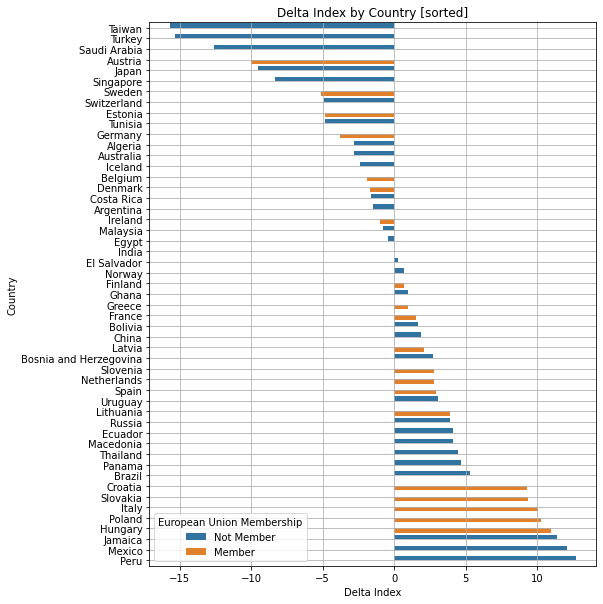

In [26]:
df_aux = df[['Country','European Union Membership','Delta Index']].sort_values(['Delta Index']).reset_index(drop=True)
v = 'Delta Index'
plt.rcParams['figure.figsize']=(8,10)
sns.barplot(y='Country', x=v, data=df_aux, hue='European Union Membership')
plt.title(v+' by Country [sorted]')
plt.grid()
plt.show()

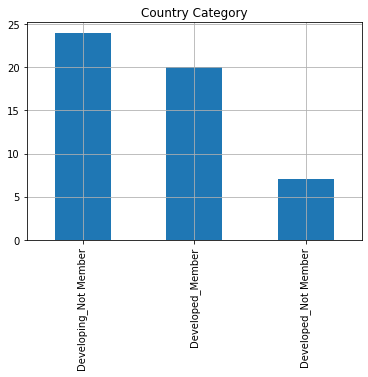

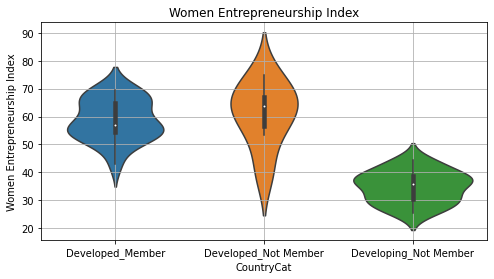

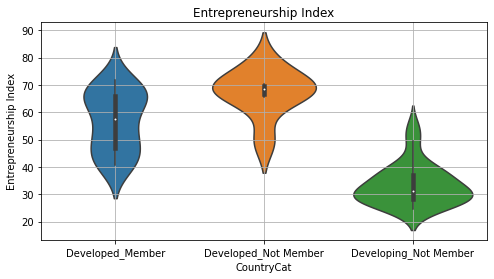

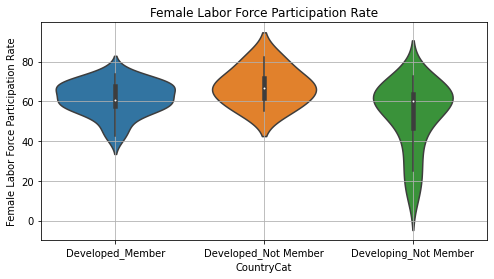

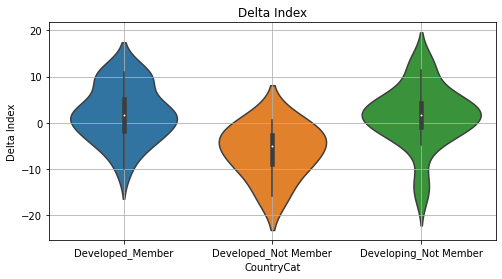

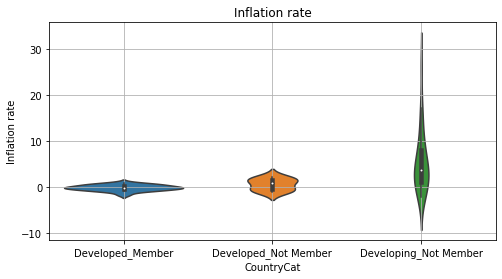

In [27]:
df['CountryCat'] = df['Level of development'] + '_' + df['European Union Membership']
plt.rcParams['figure.figsize']=(6,4)
df.CountryCat.value_counts().plot(kind='bar')
plt.title('Country Category')
plt.grid()
plt.show()

var_list = ['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Female Labor Force Participation Rate',
            'Delta Index', 'Inflation rate']
for v in var_list:
    plt.rcParams['figure.figsize']=(8,4)
    sns.violinplot(x=df['CountryCat'], y=df[v])
    plt.title(v)
    plt.ylabel(v)
    plt.grid()
    plt.show()

In [28]:
df_stats_WEntInd = df.groupby('CountryCat', as_index=False).agg(
    mean_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.mean),
    min_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.min),
    median_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.median),
    max_Women_Entr_Ind = pd.NamedAgg(column='Women Entrepreneurship Index', aggfunc=np.max))
df_stats_WEntInd

,CountryCat,mean_Women_Entr_Ind,min_Women_Entr_Ind,median_Women_Entr_Ind,max_Women_Entr_Ind
0,Developed_Member,58.835000,43.0,57.15,69.7
1,Developed_Not Member,60.857143,40.0,63.70,74.8
2,Developing_Not Member,34.870833,25.3,35.90,44.5


In [29]:
df_stats_EntInd = df.groupby('CountryCat', as_index=False).agg(
    mean_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.mean),
    min_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.min),
    median_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.median),
    max_Entr_Ind = pd.NamedAgg(column='Entrepreneurship Index', aggfunc=np.max))
df_stats_EntInd

,CountryCat,mean_Entr_Ind,min_Entr_Ind,median_Entr_Ind,max_Entr_Ind
0,Developed_Member,56.860000,40.6,57.4,71.8
1,Developed_Not Member,66.985714,49.5,68.6,77.6
2,Developing_Not Member,33.466667,24.8,31.3,54.6


In [30]:
df_stats_DeltaInd = df.groupby('CountryCat', as_index=False).agg(
    mean_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.mean),
    min_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.min),
    median_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.median),
    max_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.max))
df_stats_DeltaInd

,CountryCat,mean_DeltaInd,min_DeltaInd,median_DeltaInd,max_DeltaInd
0,Developed_Member,1.975000,-10.0,1.8,11.0
1,Developed_Not Member,-6.128571,-15.7,-4.9,0.7
2,Developing_Not Member,1.404167,-15.3,1.8,12.7


In [31]:
df_stats_FemLabF = df.groupby('CountryCat', as_index=False).agg(
    mean_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.mean),
    min_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.min),
    median_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.median),
    max_FemLabForcePart = pd.NamedAgg(column='Female Labor Force Participation Rate', aggfunc=np.max))
df_stats_FemLabF

,CountryCat,mean_FemLabForcePart,min_FemLabForcePart,median_FemLabForcePart,max_FemLabForcePart
0,Developed_Member,61.585000,42.5,60.8,74.0
1,Developed_Not Member,67.411429,55.0,66.8,82.3
2,Developing_Not Member,53.291250,13.0,60.1,73.0


In [32]:
df_stats_Infl = df.groupby('CountryCat', as_index=False).agg(
    mean_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.mean),
    min_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.min),
    median_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.median),
    max_Inflation = pd.NamedAgg(column='Inflation rate', aggfunc=np.max))
df_stats_Infl

,CountryCat,mean_Inflation,min_Inflation,median_Inflation,max_Inflation
0,Developed_Member,-0.174000,-1.70,-0.15,0.90
1,Developed_Not Member,0.551429,-1.10,0.80,2.17
2,Developing_Not Member,5.482917,-2.25,3.70,26.50


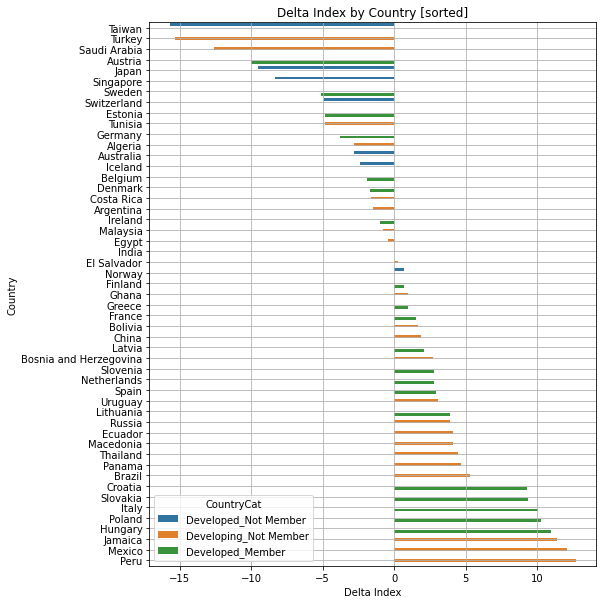

In [33]:
df_aux = df[['Country','CountryCat','Delta Index']].sort_values(['Delta Index']).reset_index(drop=True)
v = 'Delta Index'
plt.rcParams['figure.figsize']=(8,10)
sns.barplot(y='Country', x=v, data=df_aux, hue='CountryCat')
plt.title(v+' by Country [sorted]')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


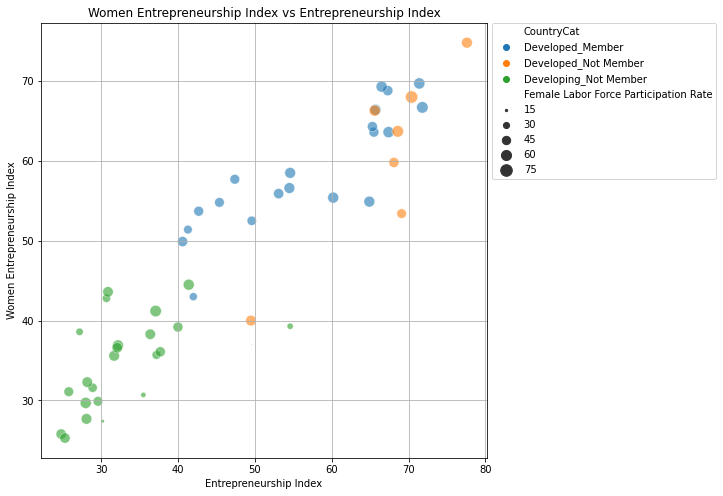

In [34]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(df['Entrepreneurship Index'], df['Women Entrepreneurship Index'],
                hue = df['CountryCat'],
                size = df['Female Labor Force Participation Rate'],
                sizes = (1,150),
                alpha = 0.6)
plt.title('Women Entrepreneurship Index vs Entrepreneurship Index')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) 
plt.grid()
plt.show()

In [35]:
fig = px.scatter(df, x='Entrepreneurship Index', y='Women Entrepreneurship Index',
                 color='CountryCat', size='Female Labor Force Participation Rate',
                 hover_data=['Country','Inflation rate'],
                 width=850, height=650,
                 opacity = 0.5,
                 title='Women Entrepreneurship Index vs Entrepreneurship Index')
fig.show()